<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/relativeFrequentPattern/basic/RSFPGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Relative Frequent Patterns in Transactional Databases using RSFPGrowth

This tutorial has two parts. In the first part, we describe the basic approach to find Relative Frequent Patterns in a transactional database using the RSFPGrowth algorithm. In the final part, we describe an advanced approach, where we evaluate the RSFPGrowth algorithm on a dataset at different minimum support threshold values.
***

# Prerequisites:



1.   Installing the PAMI library

In [1]:
!pip install -U pami #install the pami repository

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.0/835.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=8ba7e8faa7a03094d29e85b24c14bbe078bb4c3470fc8daa6dc91286a7a2c6eb
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4750 sha256=9710c6ace13e58b1077121b692b902461324e7ceb7ef7c7f7eb6efc408294d21
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


2.   Downloading a sample dataset

In [2]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv #download a sample transactional database

--2023-09-05 08:15:30--  https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4019277 (3.8M) [text/csv]
Saving to: ‘Transactional_T10I4D100K.csv’

Transactional_T10I4 100%[===================>]   3.83M  1014KB/s    in 5.6s    

2023-09-05 08:15:37 (699 KB/s) - ‘Transactional_T10I4D100K.csv’ saved [4019277/4019277]



3.   Printing few lines of a dataset to know its format.

In [3]:
!head -2 Transactional_T10I4D100K.csv

25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834
39	120	124	205	401	581	704	814	825	834


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding Relative Frequent Patterns using RSFPGrowth

### Step 1: Understanding the statistics of a database to choose an appropriate minimum support (minSup) value.

In [4]:
#import the class file
import PAMI.extras.dbStats.TransactionalDatabase as stats

#specify the file name
inputFile = 'Transactional_T10I4D100K.csv'

#initialize the class
obj=stats.TransactionalDatabase(inputFile,sep='\t')

#execute the class
obj.run()

#Printing each of the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

#saving the distribution of items' frequencies and transactional lengths
itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')

#Alternative apporach to print all of the database statistics and plot them
# obj.printStats()
# obj.plotGraphs()

Database size : 99935
Total number of items : 870
Database sparsity : 0.9883886940304302
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.667097909135199
Variance in Transaction Sizes : 13.447741640067324


### Step 2: Draw the item's frequency graph and transaction length's distribution graphs for more information

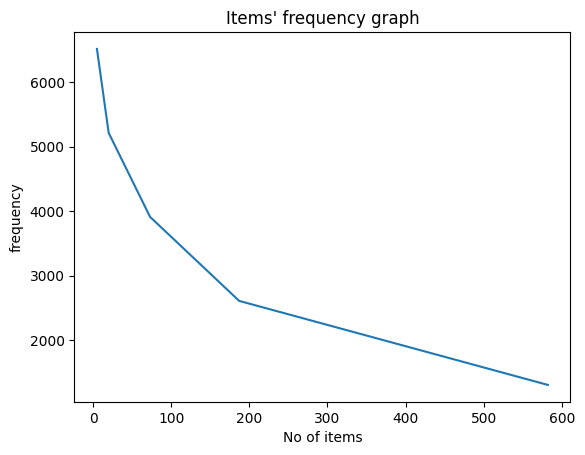

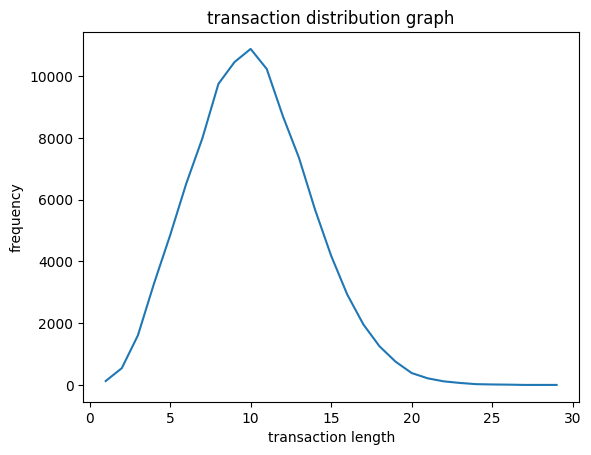

In [5]:
import PAMI.extras.graph.plotLineGraphFromDictionary as plt

itemFrequencies = obj.getFrequenciesInRange()
transactionLength = obj.getTransanctionalLengthDistribution()
plt.plotLineGraphFromDictionary(itemFrequencies, end = 100, title = 'Items\' frequency graph', xlabel = 'No of items', ylabel= 'frequency')
plt.plotLineGraphFromDictionary(transactionLength, end = 100, title = 'transaction distribution graph', xlabel = 'transaction length', ylabel = 'frequency')

### Step 3: Choosing an appropriate *minSup* value

_Observations_

  1. The input dataset is sparse as the sparsity value is 0.988 (=98.8%)
  2. Many items have low frequencies as seen in the items' frequency graph
  3. The dataset is not high dimensional as the inverted curve is around 10.

  Based on the above observations, let us choose a _minSup_ value of 100 (in count). We can increase or decrease the _minSup_ based on the number of patterns being generated.

In [6]:
minimumSupportCount = 100  #minSup is specified in count. However, the users can also specify minSup between 0 and 1.
minRS=0.5 #minRS is specified in count. However, the users can also specify different minRS value.

### Step 4: Mining Relative Frequent Patterns using RSFPGrowth

In [7]:
from PAMI.relativeFrequentPattern.basic import RSFPGrowth  as alg #import the algorithm

obj = alg.RSFPGrowth(iFile=inputFile, minSup=minimumSupportCount, minRS=minRS, sep='\t') #initialize
obj.mine()            #start the mining process

obj.save('relativeFrequentPatternsAtMinSupCount100.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Relative support frequent patterns were generated successfully using RSFPGrowth algorithm
Total No of patterns: 27517
Runtime: 21.41539216041565
Memory (RSS): 440205312
Memory (USS): 393351168


### Step 5: Investigating the generated patterns

Open the pattern's file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 3 and 4 with a different _minSup_ value.

In [8]:
!head 'relativeFrequentPatternsAtMinSupCount100.txt'

49: 137 : 1.0 
729: 102 : 1.0 
847: 179 : 1.0 
847	37: 100 : 0.5586592178770949 
806: 308 : 1.0 
806	722: 208 : 0.6753246753246753 
806	886: 203 : 0.6590909090909091 
806	886	722: 197 : 0.6396103896103896 
806	38: 200 : 0.6493506493506493 
806	38	722: 194 : 0.6298701298701299 


The storage format is: _relativeFrequentPattern:support_
***

## Part 2: Evaluating the RSFPGrowth algorithm on a dataset at different minSup values

### Step 1: Import the libraries and specify the input parameters

In [9]:
#Import the libraries
from PAMI.relativeFrequentPattern.basic import RSFPGrowth  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'Transactional_T10I4D100K.csv'
seperator='\t'
minRS=0.5
minimumSupportCountList = [100, 200, 300, 400, 500]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of RSFPGrowth

In [10]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'minRS', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of RSFPGrowth algorithm

### Step 3: Execute the algorithm at different minSup values

In [11]:
for minSupCount in minimumSupportCountList:
    obj = alg.RSFPGrowth(inputFile, minSup=minSupCount, minRS=minRS, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['RSFPGrowth', minSupCount, minRS, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Relative support frequent patterns were generated successfully using RSFPGrowth algorithm
Relative support frequent patterns were generated successfully using RSFPGrowth algorithm
Relative support frequent patterns were generated successfully using RSFPGrowth algorithm
Relative support frequent patterns were generated successfully using RSFPGrowth algorithm
Relative support frequent patterns were generated successfully using RSFPGrowth algorithm


### Step 4: Print the Result

In [12]:
print(result)

    algorithm  minSup  minRS  patterns    runtime     memory
0  RSFPGrowth     100    0.5     52513  25.272239  530173952
1  RSFPGrowth     200    0.5     38175  21.854108  542420992
2  RSFPGrowth     300    0.5     33720  18.709646  524402688
3  RSFPGrowth     400    0.5     29601  19.392145  554754048
4  RSFPGrowth     500    0.5     24663  17.232400  548315136


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

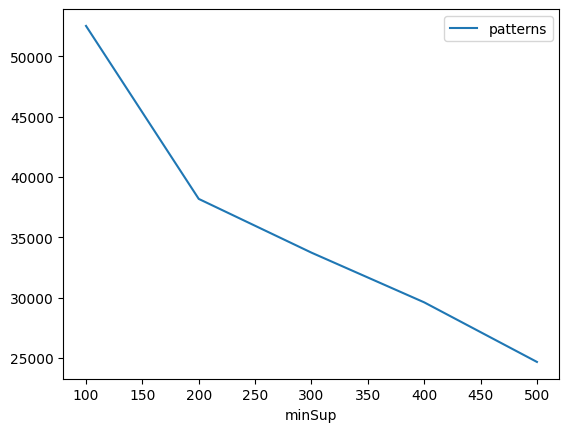

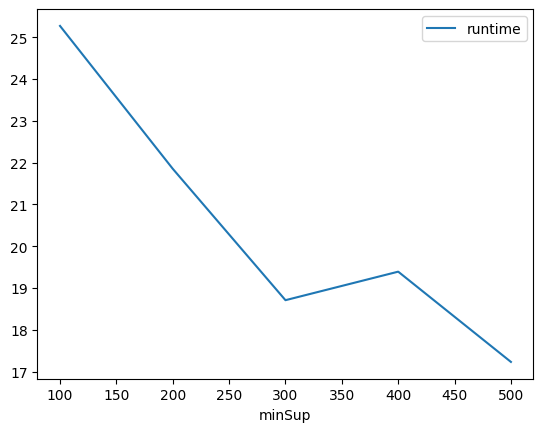

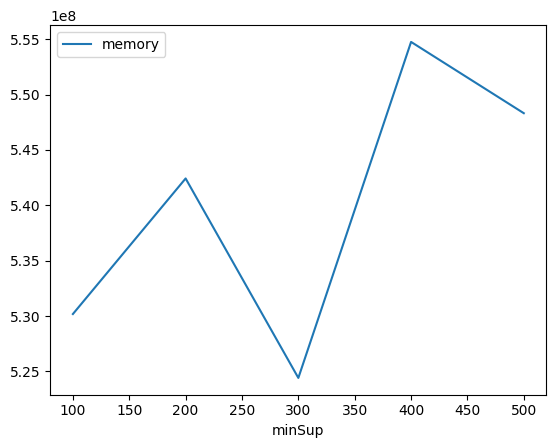

In [13]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib